#### Importing Libraries and File Reading

In [34]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, max_error
from sklearn.model_selection import GridSearchCV
import matplotlib.dates as mdates

In [35]:
# configurations for pandas display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_seq_items = None
pd.set_option('max_colwidth', None)

# Disable all warnings
warnings.filterwarnings("ignore")

In [36]:
platinum_price = pd.read_csv('processed_price_platinum.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [37]:
platinum_price.head(5)

,PLT_price,PLT_open,PLT_high,PLT_low,PLT_trend,SF_price,SF_open,SF_high,SF_low,SF_volume,SF_trend,PLD_price,PLD_open,PLD_high,PLD_low,PLD_trend,RHO_price,GOLD_open,GOLD_high,GOLD_low,GOLD_close,GOLD_ajclose,GOLD_volume,EG_open,EG_high,EG_low,EG_close,EG_ajclose,EG_volume,GDX_open,GDX_high,GDX_low,GDX_close,GDX_ajclose,GDX_volume,SP_open,SP_high,SP_low,SP_close,SP_ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_ajclose,DJ_volume,EU_price,EU_open,EU_high,EU_low,EU_trend,USDI_price,USDI_open,USDI_high,USDI_low,USDI_volume,USDI_trend,OF_price,OF_open,OF_high,OF_low,OF_volume,OF_trend,OS_price,OS_open,OS_high,OS_low,OS_trend,USO_open,USO_high,USO_low,USO_close,USO_ajclose,USO_volume,USB_price,USB_open,USB_high,USB_low,USB_trend
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,1414.65,1420.30,1423.35,1376.85,0,53604,54248,54248,52316,119440,1,618.85,614.70,615.00,614.60,1,1425.0,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,74.550003,76.150002,72.150002,72.900002,70.431755,787900,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,1.3018,1.2982,1.3051,1.2957,1,80.341,80.565,80.630,80.130,22850,0,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,1.911,1.911,1.911,1.911,1
2011-12-16,1420.25,1414.75,1431.75,1400.70,1,53458,53650,54030,52890,65390,0,623.65,622.60,623.45,622.30,1,1400.0,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,73.599998,75.099998,73.349998,74.900002,72.364037,896600,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,1.3035,1.3020,1.3087,1.2997,1,80.249,80.175,80.395,79.935,13150,0,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,1.851,1.851,1.851,1.851,0
2011-12-19,1411.10,1422.65,1427.60,1404.60,0,52961,53400,53400,52544,67280,0,608.80,626.00,630.00,608.60,0,1400.0,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,1.2995,1.3043,1.3044,1.2981,0,80.207,80.300,80.470,80.125,970,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,1.810,1.810,1.810,1.810,0
2011-12-20,1434.75,1408.95,1436.55,1408.15,1,53487,52795,53575,52595,55130,1,626.65,622.45,622.45,622.45,1,1400.0,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,66.449997,68.099998,66.000000,67.000000,64.731514,875300,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,1.3079,1.3003,1.3133,1.2994,1,80.273,80.890,80.940,80.035,22950,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,1.927,1.927,1.927,1.927,1
2011-12-21,1429.05,1434.40,1453.75,1417.65,0,53148,53519,54184,52937,75950,0,635.90,625.70,641.50,623.80,1,1400.0,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,67.099998,69.400002,66.900002,68.500000,66.180725,837600,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,1.3045,1.3079,1.3197,1.3024,0,80.350,80.105,80.445,79.550,24140,1,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,37.669998,38.240002,37.520000,38.110001,38.110001,1

In [38]:
platinum_price.tail(5)

,PLT_price,PLT_open,PLT_high,PLT_low,PLT_trend,SF_price,SF_open,SF_high,SF_low,SF_volume,SF_trend,PLD_price,PLD_open,PLD_high,PLD_low,PLD_trend,RHO_price,GOLD_open,GOLD_high,GOLD_low,GOLD_close,GOLD_ajclose,GOLD_volume,EG_open,EG_high,EG_low,EG_close,EG_ajclose,EG_volume,GDX_open,GDX_high,GDX_low,GDX_close,GDX_ajclose,GDX_volume,SP_open,SP_high,SP_low,SP_close,SP_ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_ajclose,DJ_volume,EU_price,EU_open,EU_high,EU_low,EU_trend,USDI_price,USDI_open,USDI_high,USDI_low,USDI_volume,USDI_trend,OF_price,OF_open,OF_high,OF_low,OF_volume,OF_trend,OS_price,OS_open,OS_high,OS_low,OS_trend,USO_open,USO_high,USO_low,USO_close,USO_ajclose,USO_volume,USB_price,USB_open,USB_high,USB_low,USB_trend
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-24,788.40,791.85,798.3,788.30,0,37541,37325,37600,37305,9460,1,1172.8,1163.40,1177.6,1157.9,1,2480.0,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,2.95,3.05,2.90,2.95,2.95,655100,20.700001,21.110001,20.650000,21.090000,21.090000,60507000,239.039993,240.839996,234.270004,234.339996,234.339996,147311600,22317.27930,22339.86914,21792.19922,21792.19922,21792.19922,308420000,1.1400,1.1370,1.1439,1.1350,1,96.007,96.440,96.440,95.870,13930,0,50.47,53.49,54.66,50.36,76220,0,42.27,45.34,45.95,42.22,0,9.49,9.52,9.28,9.29,9.29,21598200,2.736,2.826,2.826,2.733,0
2018-12-26,799.25,788.75,804.3,788.75,1,38253,37607,38489,37574,19410,1,1190.1,1176.00,1191.0,1175.5,1,2480.0,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,3.00,3.05,2.90,3.00,3.00,746300,21.350000,21.400000,20.530001,20.620001,20.620001,76365200,235.970001,246.179993,233.759995,246.179993,246.179993,218485400,21857.73047,22878.91992,21712.52930,22878.44922,22878.44922,433080000,1.1353,1.1363,1.1423,1.1342,0,96.568,96.100,96.650,96.020,15660,1,54.47,50.84,55.29,49.93,77000,1,46.39,43.09,46.78,42.34,1,9.25,9.92,9.23,9.90,9.90,40978800,2.810,2.751,2.815,2.720,1
2018-12-27,795.50,799.40,802.2,785.10,0,38690,38274,38783,38081,19650,1,1196.0,1190.05,1198.4,1181.5,1,2470.0,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,2.95,3.00,2.90,2.95,2.95,744000,20.840000,21.000000,20.700001,20.969999,20.969999,52393000,242.570007,248.289993,238.960007,248.070007,248.070007,186267300,22629.06055,23138.89063,22267.41992,23138.82031,23138.82031,407940000,1.1430,1.1353,1.1457,1.1349,1,96.001,96.460,96.495,95.935,20520,0,52.16,54.65,54.67,51.94,102590,0,45.23,46.41,46.41,44.20,0,9.59,9.65,9.37,9.62,9.62,36578700,2.774,2.803,2.806,2.733,0
2018-12-28,790.25,795.60,800.5,787.75,0,38706,38749,38880,38587,14200,1,1185.2,1196.00,1204.8,1179.5,0,2460.0,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,2.85,2.95,2.85,2.90,2.90,1061100,20.889999,21.020000,20.570000,20.600000,20.600000,49835000,249.580002,251.399994,246.449997,247.750000,247.750000,153100200,23213.60938,23381.88086,22981.33008,23062.40039,23062.40039,336510000,1.1438,1.1429,1.1478,1.1424,1,95.965,96.020,96.050,95.740,14170,0,52.20,53.44,53.80,51.60,17110,1,44.92,45.23,46.02,44.27,0,9.54,9.65,9.38,9.53,9.53,22803400,2.716,2.768,2.781,2.713,0
2018-12-31,801.40,795.95,802.8,793.10,1,38821,38798,38877,38550,13780,1,1197.5,1185.20,1198.8,1183.6,1,2460.0,120.980003,121.260002,120.830002,121.250000,121.250000,8449400,2.77,2.95,2.73,2.88,2.88,1031800,20.700001,21.129999,20.559999,21.090000,21.090000,53866600,249.559998,250.190002,247.470001,249.919998,249.919998,144299400,23153.93945,23333.17969,23118.30078,23327.46094,23327.46094,288830000,1.1470,1.1443,1.1470,1.1421,1,95.735,95.965,96.070,95.585,16650,0,53.80,53.00,54.82,52.66,109110,1,45.00,45.34,46.36,44.59,0,9.63,9.71,9.44,9.66,9.66,28417400,2.686,2.730,2.745,2.679,0


In [39]:
platinum_price.columns

Index(['PLT_price', 'PLT_open', 'PLT_high', 'PLT_low', 'PLT_trend', 'SF_price',
       'SF_open', 'SF_high', 'SF_low', 'SF_volume', 'SF_trend', 'PLD_price',
       'PLD_open', 'PLD_high', 'PLD_low', 'PLD_trend', 'RHO_price',
       'GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'GOLD_ajclose',
       'GOLD_volume', 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_ajclose',
       'EG_volume', 'GDX_open', 'GDX_high', 'GDX_low', 'GDX_close',
       'GDX_ajclose', 'GDX_volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close',
       'SP_ajclose', 'SP_volume', 'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close',
       'DJ_ajclose', 'DJ_volume', 'EU_price', 'EU_open', 'EU_high', 'EU_low',
       'EU_trend', 'USDI_price', 'USDI_open', 'USDI_high', 'USDI_low',
       'USDI_volume', 'USDI_trend', 'OF_price', 'OF_open', 'OF_high', 'OF_low',
       'OF_volume', 'OF_trend', 'OS_price', 'OS_open', 'OS_high', 'OS_low',
       'OS_trend', 'USO_open', 'USO_high', 'USO_low', 'USO_close',
       'USO_ajclose', 

### 3.3 Finding Correlation

In [40]:
platinum_price_corr = platinum_price.corrwith(platinum_price['PLT_price'])

# Convert to dataframe
platinum_price_corr_df = platinum_price_corr.to_frame(name='Correlation with PLT_price')
platinum_price_corr_df = platinum_price_corr_df.drop('PLT_price').sort_values(
                       by='Correlation with PLT_price', ascending=False)

# Display the DataFrame
platinum_price_corr_df.shape

(79, 1)

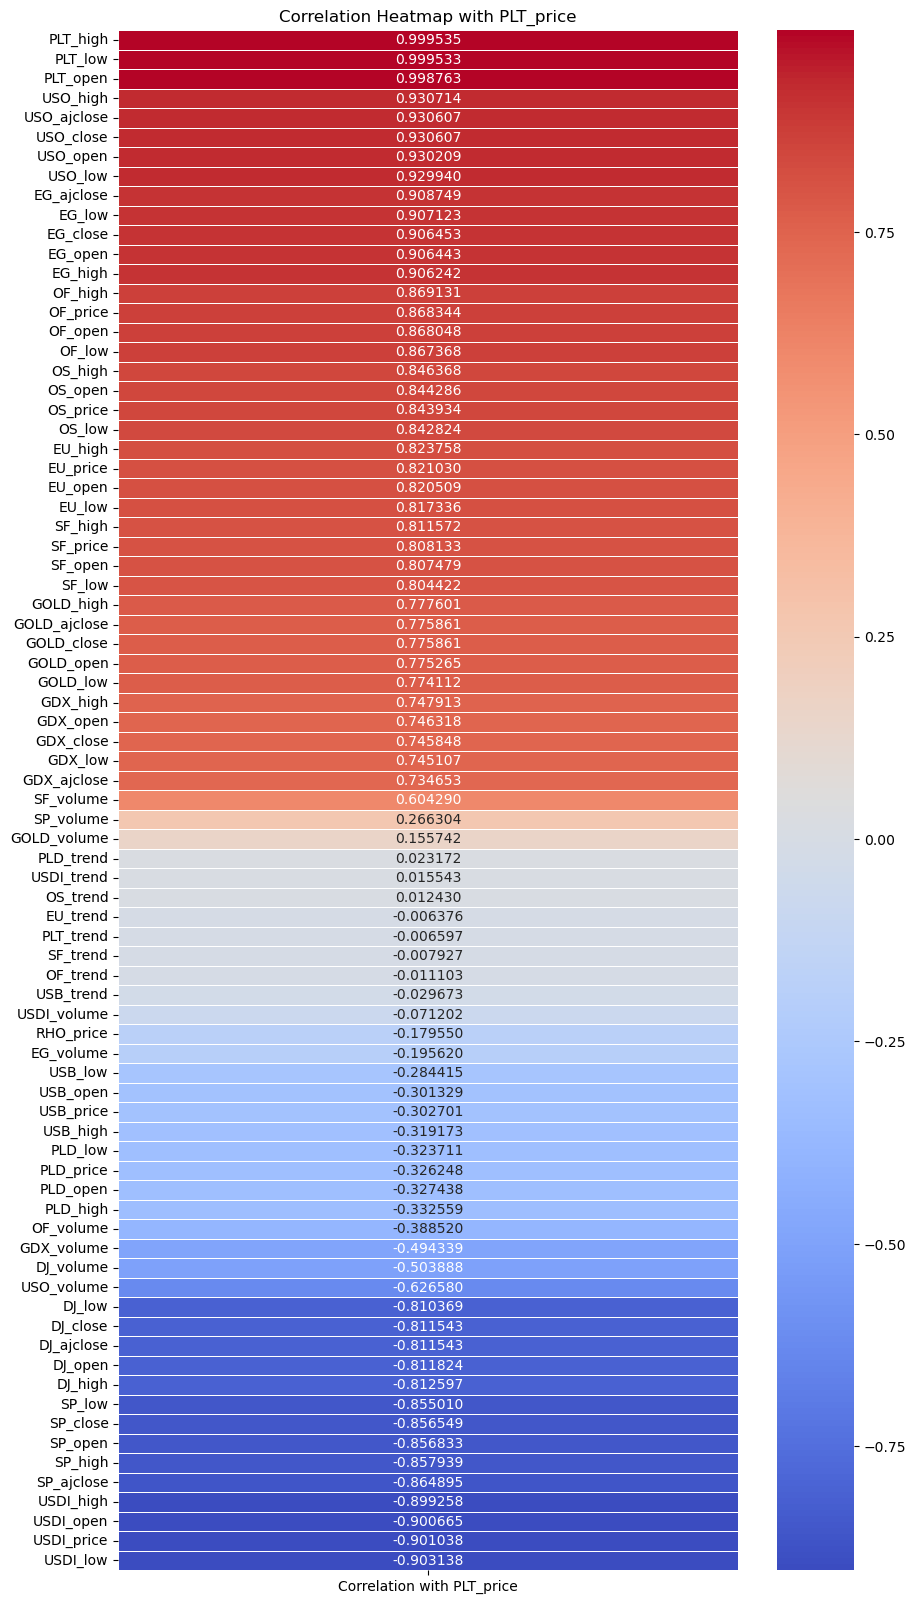

In [41]:
# Create a heatmap for the correlations
plt.figure(figsize=(10, 20))
sns.heatmap(platinum_price_corr_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".6f")
plt.title('Correlation Heatmap with PLT_price')
plt.show()

In [42]:
platinum_price_high_corr_df = platinum_price_corr_df[platinum_price_corr_df['Correlation with PLT_price'] > 0.7]

platinum_price_high_corr_df

,Correlation with PLT_price
PLT_high,0.999535
PLT_low,0.999533
PLT_open,0.998763
USO_high,0.930714
USO_ajclose,0.930607
USO_close,0.930607
USO_open,0.930209
USO_low,0.929940
EG_ajclose,0.908749
EG_low,0.907123


In [43]:
platinum_price_high_corr_df.shape

(39, 1)

#### Now, the 'platinum_price_high_corr_df' has only the columns which has > 0.7 correlation with PLT_price

### 3.4 Train Test Split (Time Series Split)

#### Two sets of train-test splited datasets:
* **1**: X_all_train, X_all_test, y_all_train, y_all_test (all original columns)
* **2**: X_high_corr_train, X_high_corr_test, y_high_corr_train, y_high_corr_test (only > 0.7 correlation with PLT_price columns)

In [44]:
# Define target variable
y = platinum_price['PLT_price']

In [45]:
# 1: X_all_train, X_all_test, y_all_train, y_all_test

# Include all features except the target variable
X_all = platinum_price.drop(columns=['PLT_price'])

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 10)

# Perform the time series split
for train_index, test_index in tscv.split(X_all):
    X_all_train, X_all_test = X_all.iloc[train_index], X_all.iloc[test_index]
    y_all_train, y_all_test = y.iloc[train_index], y.iloc[test_index]

# Print the shapes of the train and test sets for each split
print("Shapes of the train and test sets for split:")
print("X_all_train:", X_all_train.shape)
print("X_all_test:", X_all_test.shape)
print("y_all_train:", y_all_train.shape)
print("y_all_test:", y_all_test.shape)

Shapes of the train and test sets for split:
X_all_train: (1562, 79)
X_all_test: (156, 79)
y_all_train: (1562,)
y_all_test: (156,)


In [46]:
# 2: X_high_corr_train, X_high_corr_test, y_high_corr_train, y_high_corr_test

# Features with correlation > 0.7
high_corr_features = platinum_price_high_corr_df[platinum_price_high_corr_df['Correlation with PLT_price'] > 0.7].index.tolist()

# Splitting the dataset with high correlated features
X_high_corr = platinum_price[high_corr_features]

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Perform the time series split
for train_index, test_index in tscv.split(X_high_corr):
    X_high_corr_train, X_high_corr_test = X_high_corr.iloc[train_index], X_high_corr.iloc[test_index]
    y_high_corr_train, y_high_corr_test = y.iloc[train_index], y.iloc[test_index]

# Print the shapes of the train and test sets for each split
print("Shapes of the train and test sets for split:")
print("X_high_corr_train:", X_high_corr_train.shape)
print("X_high_corr_test:", X_high_corr_test.shape)
print("y_high_corr_train:", y_high_corr_train.shape)
print("y_high_corr_test:", y_high_corr_test.shape)

Shapes of the train and test sets for split:
X_high_corr_train: (1432, 39)
X_high_corr_test: (286, 39)
y_high_corr_train: (1432,)
y_high_corr_test: (286,)


### 3.5 Normalisation

#### 2 sets of train-test splited dataset, normalised
* **1**: X_all_train_scaled, X_all_test_scaled, y_all_train, y_all_test (all original columns)
* **2**: X_high_corr_train_scaled, X_high_corr_test_scaled, y_high_corr_train, y_high_corr_test (only > 0.7 correlation with PLT_price columns)

In [47]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [48]:
# For X_all_train and X_all_test
# Fit and transform on the training data
X_all_train_scaled = scaler.fit_transform(X_all_train)
# Transform the test data using the same scaler
X_all_test_scaled = scaler.transform(X_all_test)

# Convert the scaled NumPy arrays back to dataframes
X_all_train_scaled = pd.DataFrame(X_all_train_scaled, columns=X_all_train.columns, index=X_all_train.index)
X_all_test_scaled = pd.DataFrame(X_all_test_scaled, columns=X_all_test.columns, index=X_all_test.index)

In [49]:
# For X_high_corr_train and X_high_corr_test
# Fit and transform on the training data
X_high_corr_train_scaled = scaler.fit_transform(X_high_corr_train)
# Transform the test data using the same scaler
X_high_corr_test_scaled = scaler.transform(X_high_corr_test)

# Convert the scaled NumPy arrays back to dataframes
X_high_corr_train_scaled = pd.DataFrame(X_high_corr_train_scaled, columns=X_high_corr_train.columns, index=X_high_corr_train.index)
X_high_corr_test_scaled = pd.DataFrame(X_high_corr_test_scaled, columns=X_high_corr_test.columns, index=X_high_corr_test.index)

## 4. Modelling

In [50]:
# Save all soultion models for evaluation
models = {}

### 4.1 Linear Regression

In [51]:
# 1. choose model class
from sklearn.linear_model import LinearRegression

#### 4.1.1 All features

In [52]:
# X_all_train_scaled, X_all_test_scaled, y_all_train, y_all_test

# 2. instantiate model
lr_all_model = LinearRegression()

# 3. fit model to data (used on training dataset)
lr_all_model.fit(X_all_train_scaled, y_all_train)

# 4. predict on new data (testing)
y_all_pred = lr_all_model.predict(X_all_test_scaled)

# 5. evaluate performance (RMSE and R2)
lr_all_rmse = mean_squared_error(y_all_test, y_all_pred, squared=False)
lr_all_r2 = r2_score(y_all_test, y_all_pred)

print("Performance Metrics for X_all dataset (LR):")
print(f"RMSE: {lr_all_rmse}")
print(f"R-squared: {lr_all_r2}")

Performance Metrics for X_all dataset (LR):
RMSE: 3.500192884631686
R-squared: 0.990754950281567


#### 4.1.2 High correlated features

In [53]:
# X_high_corr_train_scaled, X_high_corr_test_scaled, y_high_corr_train, y_high_corr_test

# 2. Instantiate the model
lr_high_corr_model = LinearRegression()

# 3. Fit the model to the training data
lr_high_corr_model.fit(X_high_corr_train_scaled, y_high_corr_train)

# 4. Predict on the test data
y_high_corr_pred = lr_high_corr_model.predict(X_high_corr_test_scaled)

# 5. Evaluate performance
lr_high_corr_rmse = mean_squared_error(y_high_corr_test, y_high_corr_pred, squared=False)
lr_high_corr_r2 = r2_score(y_high_corr_test, y_high_corr_pred)

print("\nPerformance Metrics for X_high_corr dataset (LR):")
print(f"RMSE: {lr_high_corr_rmse}")
print(f"R-squared: {lr_high_corr_r2}")


Performance Metrics for X_high_corr dataset (LR):
RMSE: 3.1234919297502657
R-squared: 0.9978234648885117


#### 4.1.3 Hyperparameter Tuning

perform grid search CV and build model

In [54]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False], 
    'positive': [True, False],
    'n_jobs': [-1, 1, 2, 4]
}

All features:

In [55]:
# Create a GridSearchCV instance
lr_all_grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
lr_all_grid_search.fit(X_all_train_scaled, y_all_train)

# Get the best model
lr_all_grid_search_model = lr_all_grid_search.best_estimator_
lr_all_grid_search_model

LinearRegression(n_jobs=-1)

In [56]:
# Predict on the test data
y_all_grid_search_pred = lr_all_grid_search_model.predict(X_all_test_scaled)

# Calculate RMSE and R-squared
lr_all_grid_search_rmse = mean_squared_error(y_all_test, y_all_grid_search_pred, squared=False)
lr_all_grid_search_r2 = r2_score(y_all_test, y_all_grid_search_pred)

print("Performance Metrics for X_all dataset (LR with GridSearchCV):")
print(f"RMSE: {lr_all_grid_search_rmse}")
print(f"R-squared: {lr_all_grid_search_r2}")

Performance Metrics for X_all dataset (LR with GridSearchCV):
RMSE: 3.500192884631686
R-squared: 0.990754950281567


High correlated features:

In [57]:
# Create a GridSearchCV instance
lr_high_corr_grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
lr_high_corr_grid_search.fit(X_high_corr_train_scaled, y_high_corr_train)

# Get the best model
lr_high_corr_grid_search_model = lr_high_corr_grid_search.best_estimator_
lr_high_corr_grid_search_model

LinearRegression(n_jobs=-1)

In [58]:
# Predict on the test data
y_high_corr_grid_search_pred = lr_high_corr_grid_search_model.predict(X_high_corr_test_scaled)

# Calculate RMSE and R-squared
lr_high_corr_grid_search_rmse = mean_squared_error(y_high_corr_test, y_high_corr_grid_search_pred, squared=False)
lr_high_corr_grid_search_r2 = r2_score(y_high_corr_test, y_high_corr_grid_search_pred)

print("Performance Metrics for X_high_corr dataset (LR with GridSearchCV):")
print(f"RMSE: {lr_high_corr_grid_search_rmse}")
print(f"R-squared: {lr_high_corr_grid_search_r2}")

Performance Metrics for X_high_corr dataset (LR with GridSearchCV):
RMSE: 3.1234919297502657
R-squared: 0.9978234648885117


#### 4.1.4 Save the models

In [59]:
models['Linear Regression'] = [lr_all_grid_search_model, lr_high_corr_grid_search_model]

### 4.2 Support Vector Regressor (SVR)

In [60]:
# 1. choose model class
from sklearn.svm import SVR

#### 4.2.1 All features

In [61]:
# X_all_train_scaled, X_all_test_scaled, y_all_train, y_all_test

# 2. instantiate model
svr_all_model = SVR()

# 3. fit model to data (used on training dataset)
svr_all_model.fit(X_all_train_scaled, y_all_train)

# 4. predict on new data (testing)
y_svr_all_pred = svr_all_model.predict(X_all_test_scaled)

# 5. evaluate performance (RMSE and R2)
svr_all_rmse = mean_squared_error(y_all_test, y_svr_all_pred, squared=False)
svr_all_r2 = r2_score(y_all_test, y_svr_all_pred)

print("Performance Metrics for X_all dataset (SVR):")
print(f"RMSE: {svr_all_rmse}")
print(f"R-squared: {svr_all_r2}")

Performance Metrics for X_all dataset (SVR):
RMSE: 254.52489673253393
R-squared: -47.88614996217836


#### 4.2.2 High correlated features

In [62]:
# X_high_corr_train_scaled, X_high_corr_test_scaled, y_high_corr_train, y_high_corr_test

# 2. Instantiate the model
svr_high_corr_model = SVR()

# 3. Fit the model to the training data
svr_high_corr_model.fit(X_high_corr_train_scaled, y_high_corr_train)

# 4. Predict on the test data
y_svr_high_corr_pred = svr_high_corr_model.predict(X_high_corr_test_scaled)

# 5. Evaluate performance
svr_high_corr_rmse = mean_squared_error(y_high_corr_test, y_svr_high_corr_pred, squared=False)
svr_high_corr_r2 = r2_score(y_high_corr_test, y_svr_high_corr_pred)

print("\nPerformance Metrics for X_high_corr dataset (SVR):")
print(f"RMSE: {svr_high_corr_rmse}")
print(f"R-squared: {svr_high_corr_r2}")


Performance Metrics for X_high_corr dataset (SVR):
RMSE: 181.7748791389845
R-squared: -6.371445012547827


#### 4.2.3 Hyperparameter Tuning

perform grid search CV and build model

In [63]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1]
}

All features:

In [64]:
# Create a GridSearchCV instance
svr_all_grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
svr_all_grid_search.fit(X_all_train_scaled, y_all_train)

# Get the best model
svr_all_grid_search_model = svr_all_grid_search.best_estimator_
svr_all_grid_search_model

SVR(C=10, kernel='linear')

In [65]:
# Predict on the test data
y_svr_all_grid_search_pred = svr_all_grid_search_model.predict(X_all_test_scaled)

# Calculate RMSE and R-squared
svr_all_grid_search_rmse = mean_squared_error(y_all_test, y_svr_all_grid_search_pred, squared=False)
svr_all_grid_search_r2 = r2_score(y_all_test, y_svr_all_grid_search_pred)

print("Performance Metrics for X_all dataset (SVR with GridSearchCV):")
print(f"RMSE: {svr_all_grid_search_rmse}")
print(f"R-squared: {svr_all_grid_search_r2}")

Performance Metrics for X_all dataset (SVR with GridSearchCV):
RMSE: 5.117501575320536
R-squared: 0.9802375280788331


High correlated features:

In [66]:
# Create a GridSearchCV instance
svr_high_corr_grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
svr_high_corr_grid_search.fit(X_high_corr_train_scaled, y_high_corr_train)

# Get the best model
svr_high_corr_grid_search_model = svr_high_corr_grid_search.best_estimator_
svr_high_corr_grid_search_model

SVR(C=10, kernel='linear')

In [67]:
# Predict on the test data
y_svr_high_corr_grid_search_pred = svr_high_corr_grid_search_model.predict(X_high_corr_test_scaled)

# Calculate RMSE and R-squared
svr_high_corr_grid_search_rmse = mean_squared_error(y_high_corr_test, y_svr_high_corr_grid_search_pred, squared=False)
svr_high_corr_grid_search_r2 = r2_score(y_high_corr_test, y_svr_high_corr_grid_search_pred)

print("Performance Metrics for X_high_corr dataset (SVR with GridSearchCV):")
print(f"RMSE: {svr_high_corr_grid_search_rmse}")
print(f"R-squared: {svr_high_corr_grid_search_r2}")

Performance Metrics for X_high_corr dataset (SVR with GridSearchCV):
RMSE: 9.573380344161334
R-squared: 0.9795536623646457


#### 4.1.4 Save the models

In [68]:
models['Support Vector Regressor'] = [svr_all_grid_search_model, svr_high_corr_grid_search_model]

### 4.3 Random Forest Regressor

In [69]:
# 1. choose model class
from sklearn.ensemble import RandomForestRegressor

#### 4.3.1 All features

In [70]:
# X_all_train_scaled, X_all_test_scaled, y_all_train, y_all_test

# 2. instantiate model
rfr_all_model = RandomForestRegressor(random_state = 1)

# 3. fit model to data (used on training dataset)
rfr_all_model.fit(X_all_train_scaled, y_all_train)

# 4. predict on new data (testing)
y_rfr_all_pred = rfr_all_model.predict(X_all_test_scaled)

# 5. evaluate performance (RMSE and R2)
rfr_all_rmse = mean_squared_error(y_all_test, y_rfr_all_pred, squared=False)
rfr_all_r2 = r2_score(y_all_test, y_rfr_all_pred)

print("Performance Metrics for X_all dataset (RFR):")
print(f"RMSE: {rfr_all_rmse}")
print(f"R-squared: {rfr_all_r2}")

Performance Metrics for X_all dataset (RFR):
RMSE: 23.42283142778752
R-squared: 0.5859964343828381


#### 4.3.2 High correlated features

In [71]:
# X_high_corr_train_scaled, X_high_corr_test_scaled, y_high_corr_train, y_high_corr_test

# 2. Instantiate the model
rfr_high_corr_model = RandomForestRegressor(random_state = 1)

# 3. Fit the model to the training data
rfr_high_corr_model.fit(X_high_corr_train_scaled, y_high_corr_train)

# 4. Predict on the test data
y_rfr_high_corr_pred = rfr_high_corr_model.predict(X_high_corr_test_scaled)

# 5. Evaluate performance
rfr_high_corr_rmse = mean_squared_error(y_high_corr_test, y_rfr_high_corr_pred, squared=False)
rfr_high_corr_r2 = r2_score(y_high_corr_test, y_rfr_high_corr_pred)

print("\nPerformance Metrics for X_high_corr dataset (RFR):")
print(f"RMSE: {rfr_high_corr_rmse}")
print(f"R-squared: {rfr_high_corr_r2}")


Performance Metrics for X_high_corr dataset (RFR):
RMSE: 16.784438604816284
R-squared: 0.9371509755667768


#### 4.3.3 Hyperparameter Tuning

perform grid search CV and build model

In [72]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

All features:

In [ ]:
# Create a GridSearchCV instance
rfr_all_grid_search = GridSearchCV(RandomForestRegressor(random_state = 1), param_grid, cv=5, scoring='neg_mean_squared_error')
rfr_all_grid_search.fit(X_all_train_scaled, y_all_train)

# Get the best model
rfr_all_grid_search_model = rfr_all_grid_search.best_estimator_
rfr_all_grid_search_model

In [ ]:
# Predict on the test data
y_rfr_all_grid_search_pred = rfr_all_grid_search_model.predict(X_all_test_scaled)

# Calculate RMSE and R-squared
rfr_all_grid_search_rmse = mean_squared_error(y_all_test, y_rfr_all_grid_search_pred, squared=False)
rfr_all_grid_search_r2 = r2_score(y_all_test, y_rfr_all_grid_search_pred)

print("Performance Metrics for X_all dataset (RFR with GridSearchCV):")
print(f"RMSE: {rfr_all_grid_search_rmse}")
print(f"R-squared: {rfr_all_grid_search_r2}")

High correlated features:

In [ ]:
# Create a GridSearchCV instance
rfr_high_corr_grid_search = GridSearchCV(RandomForestRegressor(random_state = 1), param_grid, cv=5, scoring='neg_mean_squared_error')
rfr_high_corr_grid_search.fit(X_high_corr_train_scaled, y_high_corr_train)

# Get the best model
rfr_high_corr_grid_search_model = rfr_high_corr_grid_search.best_estimator_
rfr_high_corr_grid_search_model

In [ ]:
# Predict on the test data
y_rfr_high_corr_grid_search_pred = rfr_high_corr_grid_search_model.predict(X_high_corr_test_scaled)

# Calculate RMSE and R-squared
rfr_high_corr_grid_search_rmse = mean_squared_error(y_high_corr_test, y_rfr_high_corr_grid_search_pred, squared=False)
rfr_high_corr_grid_search_r2 = r2_score(y_high_corr_test, y_rfr_high_corr_grid_search_pred)

print("Performance Metrics for X_high_corr dataset (RFR with GridSearchCV):")
print(f"RMSE: {rfr_high_corr_grid_search_rmse}")
print(f"R-squared: {rfr_high_corr_grid_search_r2}")

#### 4.3.4 Save the models

In [ ]:
models['Random Forest Regressor'] = [rfr_all_grid_search_model, rfr_high_corr_grid_search_model]

### 4.4 LassoCV

In [ ]:
# 1. choose model class
from sklearn.linear_model import LassoCV

#### 4.4.1 All features

In [ ]:
# X_all_train_scaled, X_all_test_scaled, y_all_train, y_all_test

# 2. instantiate model
lassoCV_all_model = LassoCV()

# 3. fit model to data (used on training dataset)
lassoCV_all_model.fit(X_all_train_scaled, y_all_train)

# 4. predict on new data (testing)
y_lassoCV_all_pred = lassoCV_all_model.predict(X_all_test_scaled)

# 5. evaluate performance (RMSE and R2)
lassoCV_all_rmse = mean_squared_error(y_all_test, y_lassoCV_all_pred, squared=False)
lassoCV_all_r2 = r2_score(y_all_test, y_lassoCV_all_pred)

print("Performance Metrics for X_all dataset (LassoCV):")
print(f"RMSE: {lassoCV_all_rmse}")
print(f"R-squared: {lassoCV_all_r2}")

#### 4.4.2 High correlated features

In [ ]:
# X_high_corr_train_scaled, X_high_corr_test_scaled, y_high_corr_train, y_high_corr_test

# 2. Instantiate the model
lassoCV_high_corr_model = LassoCV()

# 3. Fit the model to the training data
lassoCV_high_corr_model.fit(X_high_corr_train_scaled, y_high_corr_train)

# 4. Predict on the test data
y_lassoCV_high_corr_pred = lassoCV_high_corr_model.predict(X_high_corr_test_scaled)

# 5. Evaluate performance
lassoCV_high_corr_rmse = mean_squared_error(y_high_corr_test, y_lassoCV_high_corr_pred, squared=False)
lassoCV_high_corr_r2 = r2_score(y_high_corr_test, y_lassoCV_high_corr_pred)

print("\nPerformance Metrics for X_high_corr dataset (LassoCV):")
print(f"RMSE: {lassoCV_high_corr_rmse}")
print(f"R-squared: {lassoCV_high_corr_r2}")

#### 4.4.3 Hyperparameter Tuning

perform grid search CV and build model

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'alphas': [0.01, 0.1, 1.0, 10.0],
    'cv': [5, 10]
}

All features:

In [ ]:
# Create a GridSearchCV instance
lassoCV_all_grid_search = GridSearchCV(LassoCV(), param_grid, cv=5, scoring='neg_mean_squared_error')
lassoCV_all_grid_search.fit(X_all_train_scaled, y_all_train)

# Get the best model
lassoCV_all_grid_search_model = lassoCV_all_grid_search.best_estimator_
lassoCV_all_grid_search_model

In [ ]:
# Predict on the test data
y_lassoCV_all_grid_search_pred = lassoCV_all_grid_search_model.predict(X_all_test_scaled)

# Calculate RMSE and R-squared
lassoCV_all_grid_search_rmse = mean_squared_error(y_all_test, y_lassoCV_all_grid_search_pred, squared=False)
lassoCV_all_grid_search_r2 = r2_score(y_all_test, y_lassoCV_all_grid_search_pred)

print("Performance Metrics for X_all dataset (LassoCV with GridSearchCV):")
print(f"RMSE: {lassoCV_all_grid_search_rmse}")
print(f"R-squared: {lassoCV_all_grid_search_r2}")

High correlated features:

In [ ]:
# Create a GridSearchCV instance
lassoCV_high_corr_grid_search = GridSearchCV(LassoCV(), param_grid, cv=5, scoring='neg_mean_squared_error')
lassoCV_high_corr_grid_search.fit(X_high_corr_train_scaled, y_high_corr_train)

# Get the best model
lassoCV_high_corr_grid_search_model = lassoCV_high_corr_grid_search.best_estimator_
lassoCV_high_corr_grid_search_model

In [ ]:
# Predict on the test data
y_lassoCV_high_corr_grid_search_pred = lassoCV_high_corr_grid_search_model.predict(X_high_corr_test_scaled)

# Calculate RMSE and R-squared
lassoCV_high_corr_grid_search_rmse = mean_squared_error(y_high_corr_test, y_lassoCV_high_corr_grid_search_pred, squared=False)
lassoCV_high_corr_grid_search_r2 = r2_score(y_high_corr_test, y_lassoCV_high_corr_grid_search_pred)

print("Performance Metrics for X_high_corr dataset (LassoCV with GridSearchCV):")
print(f"RMSE: {lassoCV_high_corr_grid_search_rmse}")
print(f"R-squared: {lassoCV_high_corr_grid_search_r2}")

#### 4.4.4 Save the models

In [ ]:
models['LassoCV'] = [lassoCV_all_grid_search_model, lassoCV_high_corr_grid_search_model]

### 4.5 RidgeCV

In [ ]:
# 1. choose model class
from sklearn.linear_model import RidgeCV

#### 4.5.1 All features

In [ ]:
# X_all_train_scaled, X_all_test_scaled, y_all_train, y_all_test

# 2. instantiate model
ridgeCV_all_model = RidgeCV()

# 3. fit model to data (used on training dataset)
ridgeCV_all_model.fit(X_all_train_scaled, y_all_train)

# 4. predict on new data (testing)
y_ridgeCV_all_pred = ridgeCV_all_model.predict(X_all_test_scaled)

# 5. evaluate performance (RMSE and R2)
ridgeCV_all_rmse = mean_squared_error(y_all_test, y_ridgeCV_all_pred, squared=False)
ridgeCV_all_r2 = r2_score(y_all_test, y_ridgeCV_all_pred)

print("Performance Metrics for X_all dataset (RidgeCV):")
print(f"RMSE: {ridgeCV_all_rmse}")
print(f"R-squared: {ridgeCV_all_r2}")

#### 4.5.2 High correlated features

In [ ]:
# X_high_corr_train_scaled, X_high_corr_test_scaled, y_high_corr_train, y_high_corr_test

# 2. Instantiate the model
ridgeCV_high_corr_model = RidgeCV()

# 3. Fit the model to the training data
ridgeCV_high_corr_model.fit(X_high_corr_train_scaled, y_high_corr_train)

# 4. Predict on the test data
y_ridgeCV_high_corr_pred = ridgeCV_high_corr_model.predict(X_high_corr_test_scaled)

# 5. Evaluate performance
ridgeCV_high_corr_rmse = mean_squared_error(y_high_corr_test, y_ridgeCV_high_corr_pred, squared=False)
ridgeCV_high_corr_r2 = r2_score(y_high_corr_test, y_ridgeCV_high_corr_pred)

print("\nPerformance Metrics for X_high_corr dataset (RidgeCV):")
print(f"RMSE: {ridgeCV_high_corr_rmse}")
print(f"R-squared: {ridgeCV_high_corr_r2}")

#### 4.5.3 Hyperparameter Tuning

perform grid search CV and build model

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'alphas': [(0.1, 1.0, 10.0), (0.01, 0.1, 1.0)],
    'cv': [5, 10]
}

All features:

In [ ]:
# Create a GridSearchCV instance
ridgeCV_all_grid_search = GridSearchCV(RidgeCV(), param_grid, cv=5, scoring='neg_mean_squared_error')
ridgeCV_all_grid_search.fit(X_all_train_scaled, y_all_train)

# Get the best model
ridgeCV_all_grid_search_model = ridgeCV_all_grid_search.best_estimator_
ridgeCV_all_grid_search_model

In [ ]:
# Predict on the test data
y_ridgeCV_all_grid_search_pred = ridgeCV_all_grid_search_model.predict(X_all_test_scaled)

# Calculate RMSE and R-squared
ridgeCV_all_grid_search_rmse = mean_squared_error(y_all_test, y_ridgeCV_all_grid_search_pred, squared=False)
ridgeCV_all_grid_search_r2 = r2_score(y_all_test, y_ridgeCV_all_grid_search_pred)

print("Performance Metrics for X_all dataset (RidgeCV with GridSearchCV):")
print(f"RMSE: {ridgeCV_all_grid_search_rmse}")
print(f"R-squared: {ridgeCV_all_grid_search_r2}")

High correlated features:

In [ ]:
# Create a GridSearchCV instance
ridgeCV_high_corr_grid_search = GridSearchCV(RidgeCV(), param_grid, cv=5, scoring='neg_mean_squared_error')
ridgeCV_high_corr_grid_search.fit(X_high_corr_train_scaled, y_high_corr_train)

# Get the best model
ridgeCV_high_corr_grid_search_model = ridgeCV_high_corr_grid_search.best_estimator_
ridgeCV_high_corr_grid_search_model

In [ ]:
# Predict on the test data
y_ridgeCV_high_corr_grid_search_pred = ridgeCV_high_corr_grid_search_model.predict(X_high_corr_test_scaled)

# Calculate RMSE and R-squared
ridgeCV_high_corr_grid_search_rmse = mean_squared_error(y_high_corr_test, y_ridgeCV_high_corr_grid_search_pred, squared=False)
ridgeCV_high_corr_grid_search_r2 = r2_score(y_high_corr_test, y_ridgeCV_high_corr_grid_search_pred)

print("Performance Metrics for X_high_corr dataset (RidgeCV with GridSearchCV):")
print(f"RMSE: {ridgeCV_high_corr_grid_search_rmse}")
print(f"R-squared: {ridgeCV_high_corr_grid_search_r2}")

#### 4.5.4 Save the models

In [ ]:
models['RidgeCV'] = [ridgeCV_all_grid_search_model, ridgeCV_high_corr_grid_search_model]

## 5. Evaluation

In [ ]:
models

In [ ]:
all_features_rmse = []
high_corr_features_rmse = []
model_names = []

In [ ]:
def evaluate_result(model_name, predicted, validation_X, validation_y, is_high_corr):
    RMSE_score = np.sqrt(mean_squared_error(validation_y, predicted))
    R2_score = r2_score(validation_y, predicted)
    MAE_score = mean_absolute_error(validation_y, predicted)
    MAPE_score = np.mean(np.abs((validation_y - predicted) / validation_y)) * 100
    explained_variance = explained_variance_score(validation_y, predicted)
    max_err = max_error(validation_y, predicted)
    
    if is_high_corr:
        high_corr_features_rmse.append(RMSE_score)
    else:
        all_features_rmse.append(RMSE_score)

    # Line Plot
    plt.figure(figsize=(12, 6))
    plt.plot(validation_X.index, predicted, 'r', label='Predict')
    plt.plot(validation_X.index, validation_y, 'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(f'{model_name} RMSE Error: {RMSE_score:.2f}')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
    # Scatter Plot
    plt.figure(figsize=(12, 6))
    plt.scatter(validation_y, predicted, alpha=0.5)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{model_name} RMSE Error: {RMSE_score:.2f}')
    
    # Add regression line
    z = np.polyfit(validation_y, predicted, 1)
    p = np.poly1d(z)
    plt.plot(validation_y, p(validation_y), 'r--')
    
    # Color-coding based on prediction error
    error = np.abs(predicted - validation_y)
    plt.scatter(validation_y, predicted, c=error, cmap='coolwarm', alpha=1.0)
    
    plt.tight_layout()
    plt.show()
    
    print(f'{model_name} Performance Metrics:')
    print('RMSE: ', RMSE_score)
    print('R2 score: ', R2_score)
    print('MAE: ', MAE_score)
    print('MAPE: ', MAPE_score)
    print('Explained Variance: ', explained_variance)
    print('Max Error: ', max_err)

In [ ]:
for model_key, model_list in models.items():
    model_names.append(model_key)
    for i, model in enumerate(model_list):
        # Define the appropriate validation data based on the model index
        if i == 0:
            validation_X = X_all_test_scaled
            validation_y = y_all_test
            model_name = f'{model_key} (All features)'
            is_high_corr = False
        elif i == 1:
            validation_X = X_high_corr_test_scaled
            validation_y = y_high_corr_test
            model_name = f'{model_key} (High correlation features)'
            is_high_corr = True
        
        predicted = model.predict(validation_X)
        evaluate_result(model_name, predicted, validation_X, validation_y, is_high_corr)

In [ ]:
model_names

In [ ]:
# Create an array of indices to sort the models by RMSE for high_corr_features
indices = np.argsort(high_corr_features_rmse)

# Sort the model names and RMSE values based on the indices
sorted_model_names = np.array(model_names)[indices]
sorted_all_features_rmse = np.array(all_features_rmse)[indices]
sorted_high_corr_features_rmse = np.array(high_corr_features_rmse)[indices]

# Ensure all lists have the same length
num_models = len(sorted_model_names)
sorted_all_features_rmse = sorted_all_features_rmse[:num_models]
sorted_high_corr_features_rmse = sorted_high_corr_features_rmse[:num_models]

# Create the bar chart
fig = plt.figure(figsize=(12, 6))
bars1 = plt.bar(np.arange(num_models) - 0.2, sorted_all_features_rmse, width=0.4, align="center", color='#b2b2ff', label="All features")
bars2 = plt.bar(np.arange(num_models) + 0.2, sorted_high_corr_features_rmse, width=0.4, align="center", color='#3232ff', label="High Correlation Features")

plt.xticks(np.arange(num_models), sorted_model_names)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison between All Features and High Correlation Features')
plt.legend(loc='upper center')

# Annotate each bar with its value
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                 textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()